RSI = 100 - 100 / (1 + RS)

Where RS = Average gain of up periods during the specified time frame / Average loss of down periods during the specified time frame

If RSI > 70, sell signal
If RSI < 30, buy signal

### Import CSV

In [1]:
import pandas as pd
import datetime
import numpy as np

df = pd.read_csv('S&P 500 Futures Historical Data_20 years.csv')

# remove the calculated columns
df1 = df[['Date', 'Price', 'Open', 'High', 'Low']]

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Date     5000 non-null object
Price    5000 non-null float64
Open     5000 non-null float64
High     5000 non-null float64
Low      5000 non-null float64
dtypes: float64(4), object(1)
memory usage: 195.4+ KB


In [2]:
# calculate difference of day prices
df1 = df1.reindex(index=df1.index[::-1])
df1 = df1.set_index('Date')

df1['Diff'] = df1['Price'] - df1['Open']

df1.head()

,Price,Open,High,Low,Diff
Date,,,,,
9-Nov-98,1136.5,1146.50,1149.25,1127.50,-10.00
10-Nov-98,1129.0,1136.25,1140.50,1128.00,-7.25
11-Nov-98,1126.2,1130.25,1142.00,1121.25,-4.05
12-Nov-98,1123.8,1126.00,1132.00,1118.25,-2.20
13-Nov-98,1133.3,1123.50,1134.00,1121.00,9.80


### Plot the differences

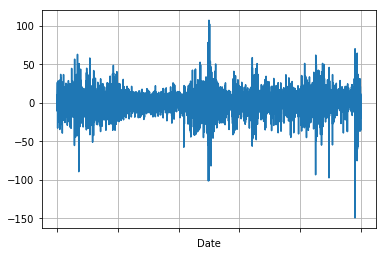

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
df1['Diff'].plot(grid=True)
plt.show()

### Calculate RSI

In [10]:
def relative_strength(diffs, win=20):
    
    seed = diffs[:win+1]
    up = seed[seed>=0].sum()/win
    down = -seed[seed<0].sum()/win
    rs = up/down
    
    #initialize RSIs as same shape as array
    rsi = np.zeros_like(diffs)
    rsi[:win] = 100. - 100./(1.+rs)

    for i in range(win, len(diffs)):
        diff = diffs[i-1]
        
        # if stock goes up
        if diff>0:
            upval = diff
            downval = 0.
        # if stock goes down
        else:
            upval = 0.
            downval = -diff
            
        # sum of all upticks / window
        up = (up*(win-1) + upval)/win
        
        #sum of downticks / window
        down = (down*(win-1) + downval)/win
        
        rs = up/down
        
        rsi[i] = 100. - 100./(1.+rs)

    return rsi

In [13]:
df1['RSI'] = relative_strength(df1['Diff'], 20)
df1.head(40)

,Price,Open,High,Low,Diff,RSI
Date,,,,,,
9-Nov-98,1136.50,1146.50,1149.25,1127.50,-10.00,57.705598
10-Nov-98,1129.00,1136.25,1140.50,1128.00,-7.25,57.705598
11-Nov-98,1126.20,1130.25,1142.00,1121.25,-4.05,57.705598
12-Nov-98,1123.80,1126.00,1132.00,1118.25,-2.20,57.705598
13-Nov-98,1133.30,1123.50,1134.00,1121.00,9.80,57.705598
16-Nov-98,1142.30,1134.75,1144.50,1129.75,7.55,57.705598
17-Nov-98,1143.50,1142.00,1157.50,1132.50,1.50,57.705598
18-Nov-98,1150.00,1143.50,1151.00,1136.00,6.50,57.705598
19-Nov-98,1158.70,1149.50,1159.00,1147.25,9.20,57.705598


### Plot RSI

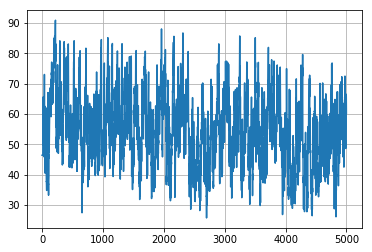

In [48]:
df1['RSI'].plot(grid=True)
# add top and bottom bands to plot
plt.show()

### Send RSI signals

In [49]:
# Sell if over high threshold / Buy if under low threshold
# thrsholds can be set by user input later
RSI_top = 70
RSI_bottom = 30

df1['RSI_Sell'] = np.where(df1['RSI']>RSI_top,1,0)
df1['RSI_Buy'] = np.where(df1['RSI']<RSI_bottom,1,0)

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [51]:
df1.head(50)

,Date,Price,Open,High,Low,Diff,RSI,RSI_Sell,RSI_Buy
0,25-Jun-18,2722.25,2757.00,2758.00,2700.50,-34.75,46.396536,0,0
1,22-Jun-18,2759.50,2750.50,2768.50,2749.25,9.00,46.396536,0,0
2,21-Jun-18,2752.50,2771.75,2785.25,2747.00,-19.25,46.396536,0,0
3,20-Jun-18,2772.00,2765.25,2778.25,2757.25,6.75,46.396536,0,0
4,19-Jun-18,2766.25,2778.25,2780.25,2735.75,-12.00,46.396536,0,0
5,18-Jun-18,2779.75,2780.00,2786.75,2761.25,-0.25,46.396536,0,0
6,15-Jun-18,2776.85,2782.50,2784.00,2766.25,-5.65,46.396536,0,0
7,14-Jun-18,2783.25,2773.25,2789.25,2767.50,10.00,46.396536,0,0
8,13-Jun-18,2774.25,2788.00,2791.75,2773.75,-13.75,46.396536,0,0
9,12-Jun-18,2784.00,2781.25,2789.75,2778.50,2.75,46.396536,0,0
